# Google Stock Price Prediction

Steps in this project according to Data Science LifeCycle;

1. <a href='#introduction_section'><b>Introduction</b></a><br>
1. <a href='#data_acquisition_section'><b>Data Acquisition</b></a><br>
2. <a href='#data_cleaning_section'><b>Data Cleaning</b></a><br>
3. <a href='#eda_section'><b>Data Exploring(EDA)</b></a><br>
4. <a href='#feature_engineering_section'><b>Feature Engineering</b></a><br>
5. <a href='#modeling_section'><b>Predictive Modeling & Evaluation</b></a><br>
7. <a href='#assumption_control_section'><b>Assumption Control</b></a><br>

<a id='introduction_section'></a>
## 1. Introduction

In this project stock price for **Google** is predicted by using several regression algorithms such as **Linear Regression**, **K-Nearest Neighbors Regression**, **Random Forest Regression**, **Decision Tree Regression**, **Ridge Regression** and **Gaussian Regression**. Data is acquired from the **Yahoo Finance API**. Exploratory Data Analysis is applied on to the obtained dataset and according to findings dataset is normalized with the MinMaxScaler() function from SciKit-Learn. After normalization the dataset, models are evaluated by using R_Square and Mean Squared Error metrics. As a result, all the applied regression models are performed quite well on the dataset. 

<a id='data_acquisition_section'></a>
## 2. Data Acquisition

The Google's Stock Price data is obtained by using the Yahoo Finance library with the 'GOOG' symbol starting from the January 1, 2000

In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# library for the stock price data
import yfinance as yf

# library for the date-time manipulation
from datetime import date, datetime, timedelta

In [2]:
# Determining start date
start_date = datetime(year=2000, month=1, day=1)
end_date = date.today()

In [3]:
stock_data = yf.download('GOOG',
                         start = start_date,
                         end = end_date,
                         progress = True)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data = stock_data.reset_index()

In [5]:
stock_data.shape

(4856, 7)

In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [7]:
stock_data.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

<a id='data_cleaning_section'></a>
## 3. Data Cleaning

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4856 non-null   datetime64[ns]
 1   Open       4856 non-null   float64       
 2   High       4856 non-null   float64       
 3   Low        4856 non-null   float64       
 4   Close      4856 non-null   float64       
 5   Adj_Close  4856 non-null   float64       
 6   Volume     4856 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 265.7 KB


In [9]:
stock_data.isna().value_counts()

Date   Open   High   Low    Close  Adj_Close  Volume
False  False  False  False  False  False      False     4856
dtype: int64

In [10]:
stock_data.duplicated().value_counts()

False    4856
dtype: int64

As it is shown in the above section, there is no empty and duplicate values in the dataset. Also, content of the features are compansible with the data types. 

<a id='eda_section'></a>
## 4. Data Exploring(EDA)

### 4.1 Plot Representation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Scatter Plot')]

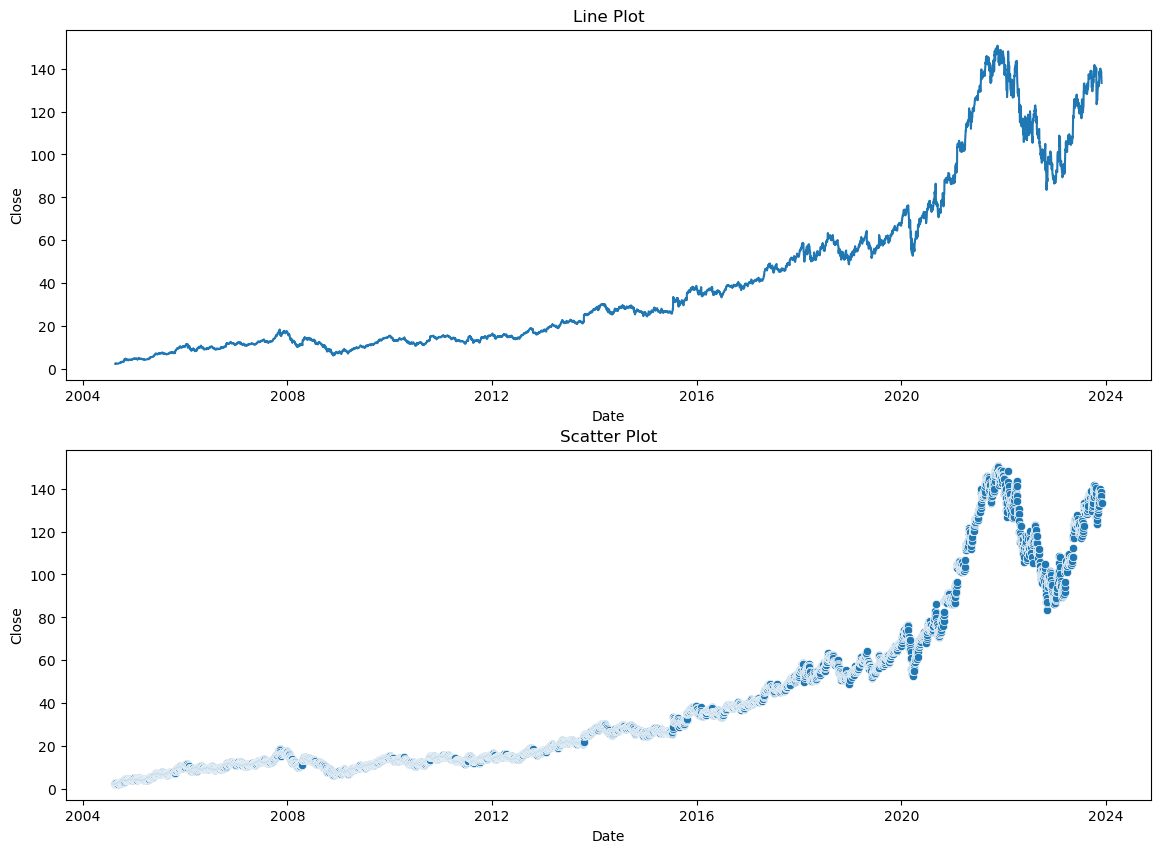

In [12]:
# Plot representation of the dataset
plt.figure(figsize=(14,10))

# Line Plot of the dataset
plt.subplot(2,1,1)
ax = sns.lineplot(data=stock_data, x = 'Date', y = 'Close')
ax.set(title='Line Plot')

# Scatter Plot of the dataset
plt.subplot(2,1,2)
ax = sns.scatterplot(stock_data, x='Date', y='Close')
ax.set(title='Scatter Plot')

### 4.2 Regression Plot

[Text(0.5, 0, 'Index'), Text(0.5, 1.0, 'Regression Plot')]

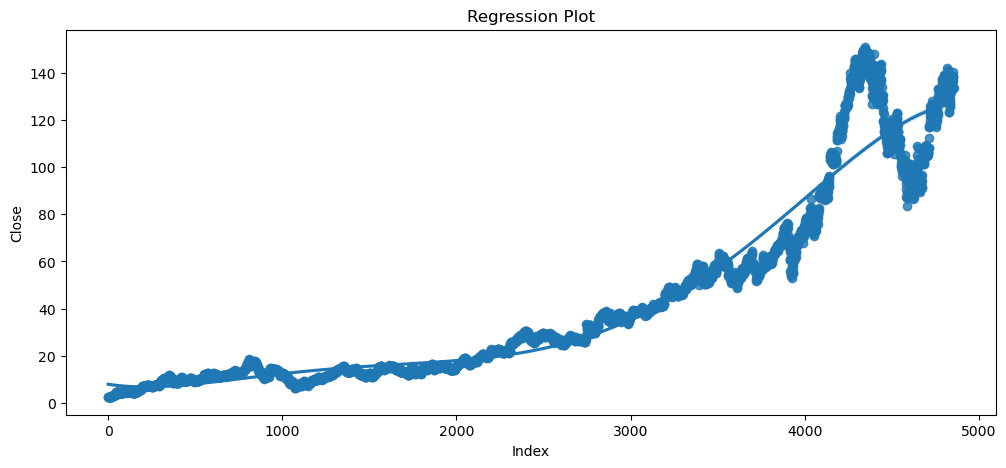

In [13]:
# Regression Plot
plt.figure(figsize=(12,5))
ax = sns.regplot(data=stock_data, x=stock_data.index, y='Close', order=5)
ax.set(xlabel='Index', title='Regression Plot')

### 4.3 Distribution Plot Representation

Open ATTRIBUTE 
Min-Max Range: [2.470490, 151.863495]
Inter Quartile Range(Q3-Q1): 44.508832
Skeweness: 1.276666
Kurtosis: 0.536787
Standard Deviation: 38.555994
Variance: 1486.564681

High ATTRIBUTE 
Min-Max Range: [2.534002, 152.100006]
Inter Quartile Range(Q3-Q1): 45.031670
Skeweness: 1.275387
Kurtosis: 0.522549
Standard Deviation: 38.996463
Variance: 1520.724125

Low ATTRIBUTE 
Min-Max Range: [2.390042, 149.887497]
Inter Quartile Range(Q3-Q1): 44.203833
Skeweness: 1.275490
Kurtosis: 0.536640
Standard Deviation: 38.158602
Variance: 1456.078881

Close ATTRIBUTE 
Min-Max Range: [2.490913, 150.709000]
Inter Quartile Range(Q3-Q1): 44.746912
Skeweness: 1.274796
Kurtosis: 0.527383
Standard Deviation: 38.582806
Variance: 1488.632914

Adj_Close ATTRIBUTE 
Min-Max Range: [2.490913, 150.709000]
Inter Quartile Range(Q3-Q1): 44.746912
Skeweness: 1.274796
Kurtosis: 0.527383
Standard Deviation: 38.582806
Variance: 1488.632914

Volume ATTRIBUTE 
Min-Max Range: [158434.000000, 1650832619.000000]
In

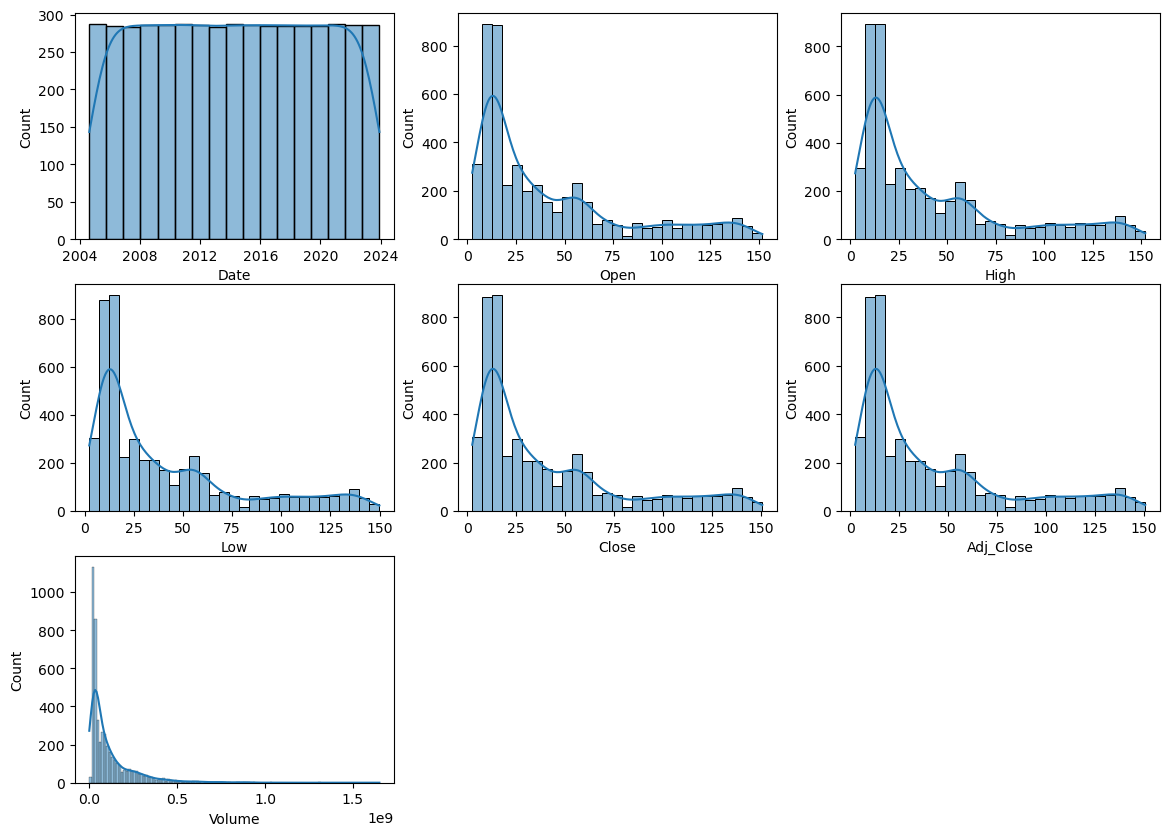

In [14]:
# Distribution Plots for the features
from scipy.stats import iqr, skew, kurtosis

plt.figure(figsize=(14,10))
for i,j in enumerate(stock_data.columns):

    if j != 'Date':

        print('%s ATTRIBUTE ' % j)
        # Range
        print('Min-Max Range: [%f, %f]' % (min(stock_data[j]), max(stock_data[j])))

        # IQR: Inter Quartile Range
        print('Inter Quartile Range(Q3-Q1): %f' % iqr(stock_data[j]))

        # Distribution properties
        print('Skeweness: %f' % skew(stock_data[j]))
        print('Kurtosis: %f' % kurtosis(stock_data[j]))
        print('Standard Deviation: %f' % stock_data[j].std())
        print('Variance: %f\n' % stock_data[j].var())
              
    plt.subplot(3,3,i+1)
    sns.histplot(stock_data[j], kde=True)

As it can be seen from the distribution plots, there is no feature that has Gaussian Distribution. Also, all features has a Leptokurtic and extremely positive skeweness character.

### 4.4 Box Plot Representation

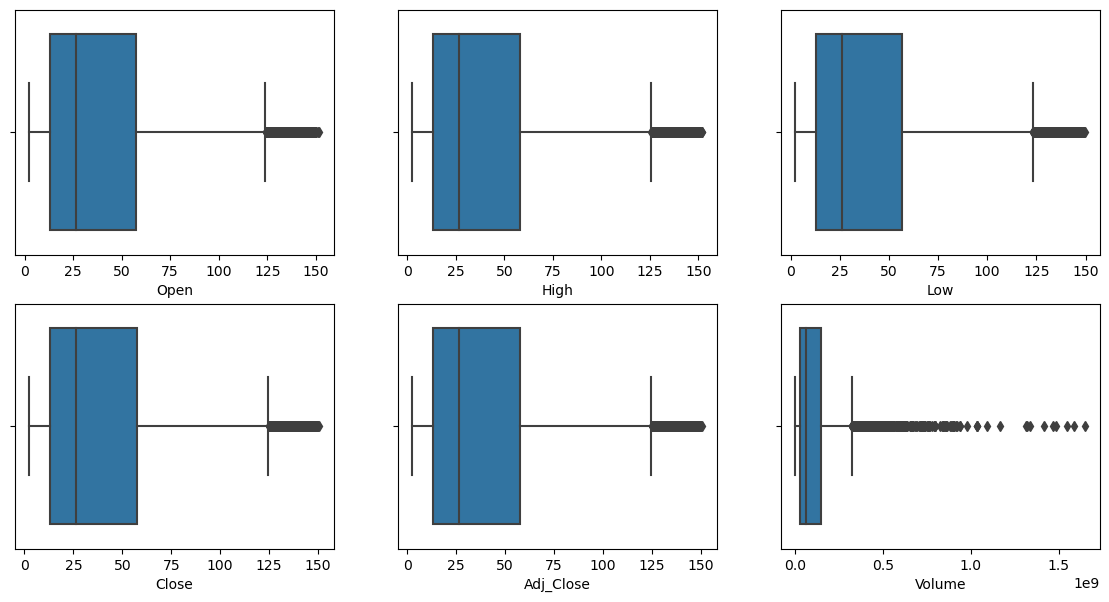

In [15]:
# Box Plots for the features
plt.figure(figsize=(14,7))
for i,j in enumerate(stock_data.columns):
    if stock_data.columns[i] == 'Date':
        continue
    else:
        plt.subplot(2,3,i)
        sns.boxplot(x = stock_data[j])

Acccording to above box plots, Volume has lots of extreme values.

### 4.5 Correlation With Heatmap

Text(0.5, 1.0, 'Correlations Of Features')

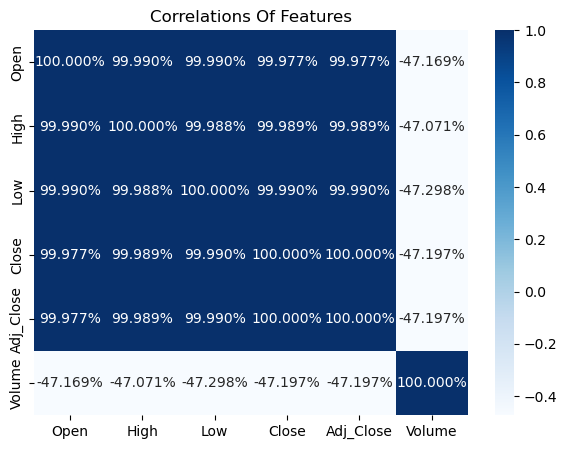

In [16]:
correlation = stock_data.corr(numeric_only=True)

plt.figure(figsize=(7, 5))
sns.heatmap(correlation, annot=True, fmt='.3%', cmap='Blues')
plt.title('Correlations Of Features')

As it can be seen, there is strong correlation between features except 'Volume' feature. Thus, elimination of some of features might be considered in the later processes.

### 3.6 Pair Plots

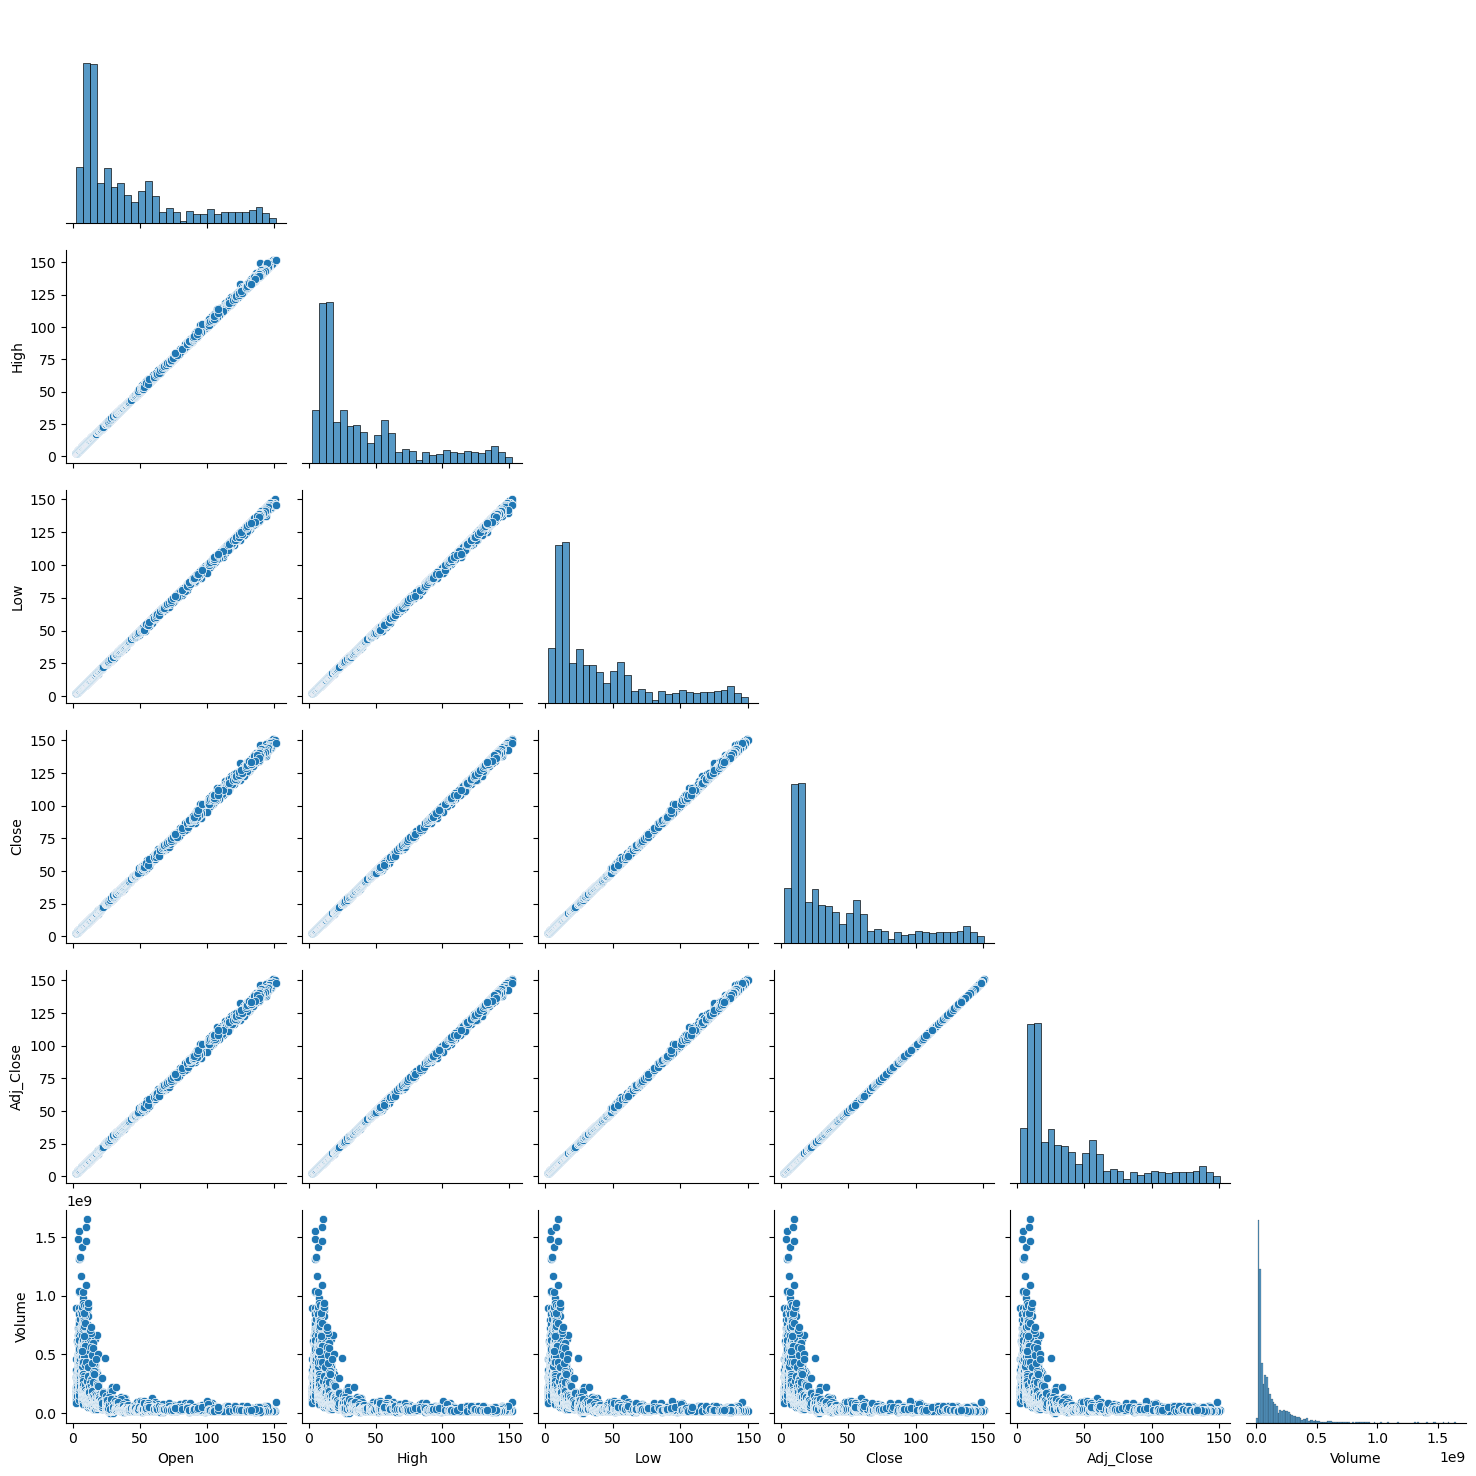

In [17]:
sns.pairplot(stock_data, corner=True)

Results of the pair plots are compatible with the correlation results. In a nutshell, there is strong relations between features except 'Volume'.

<a id='feature_engineering_section'></a>
## 5. Feature Engineering

In the direction of **Data Exploring** results, there are strong correlation between features except 'Volume' feature. Also, ther features have different ranges. Therefore, these features need to be properly scaled. In order to conduct scaling operation, **Normalization Operation** is selected to map the actual range between 0 and 1 range.

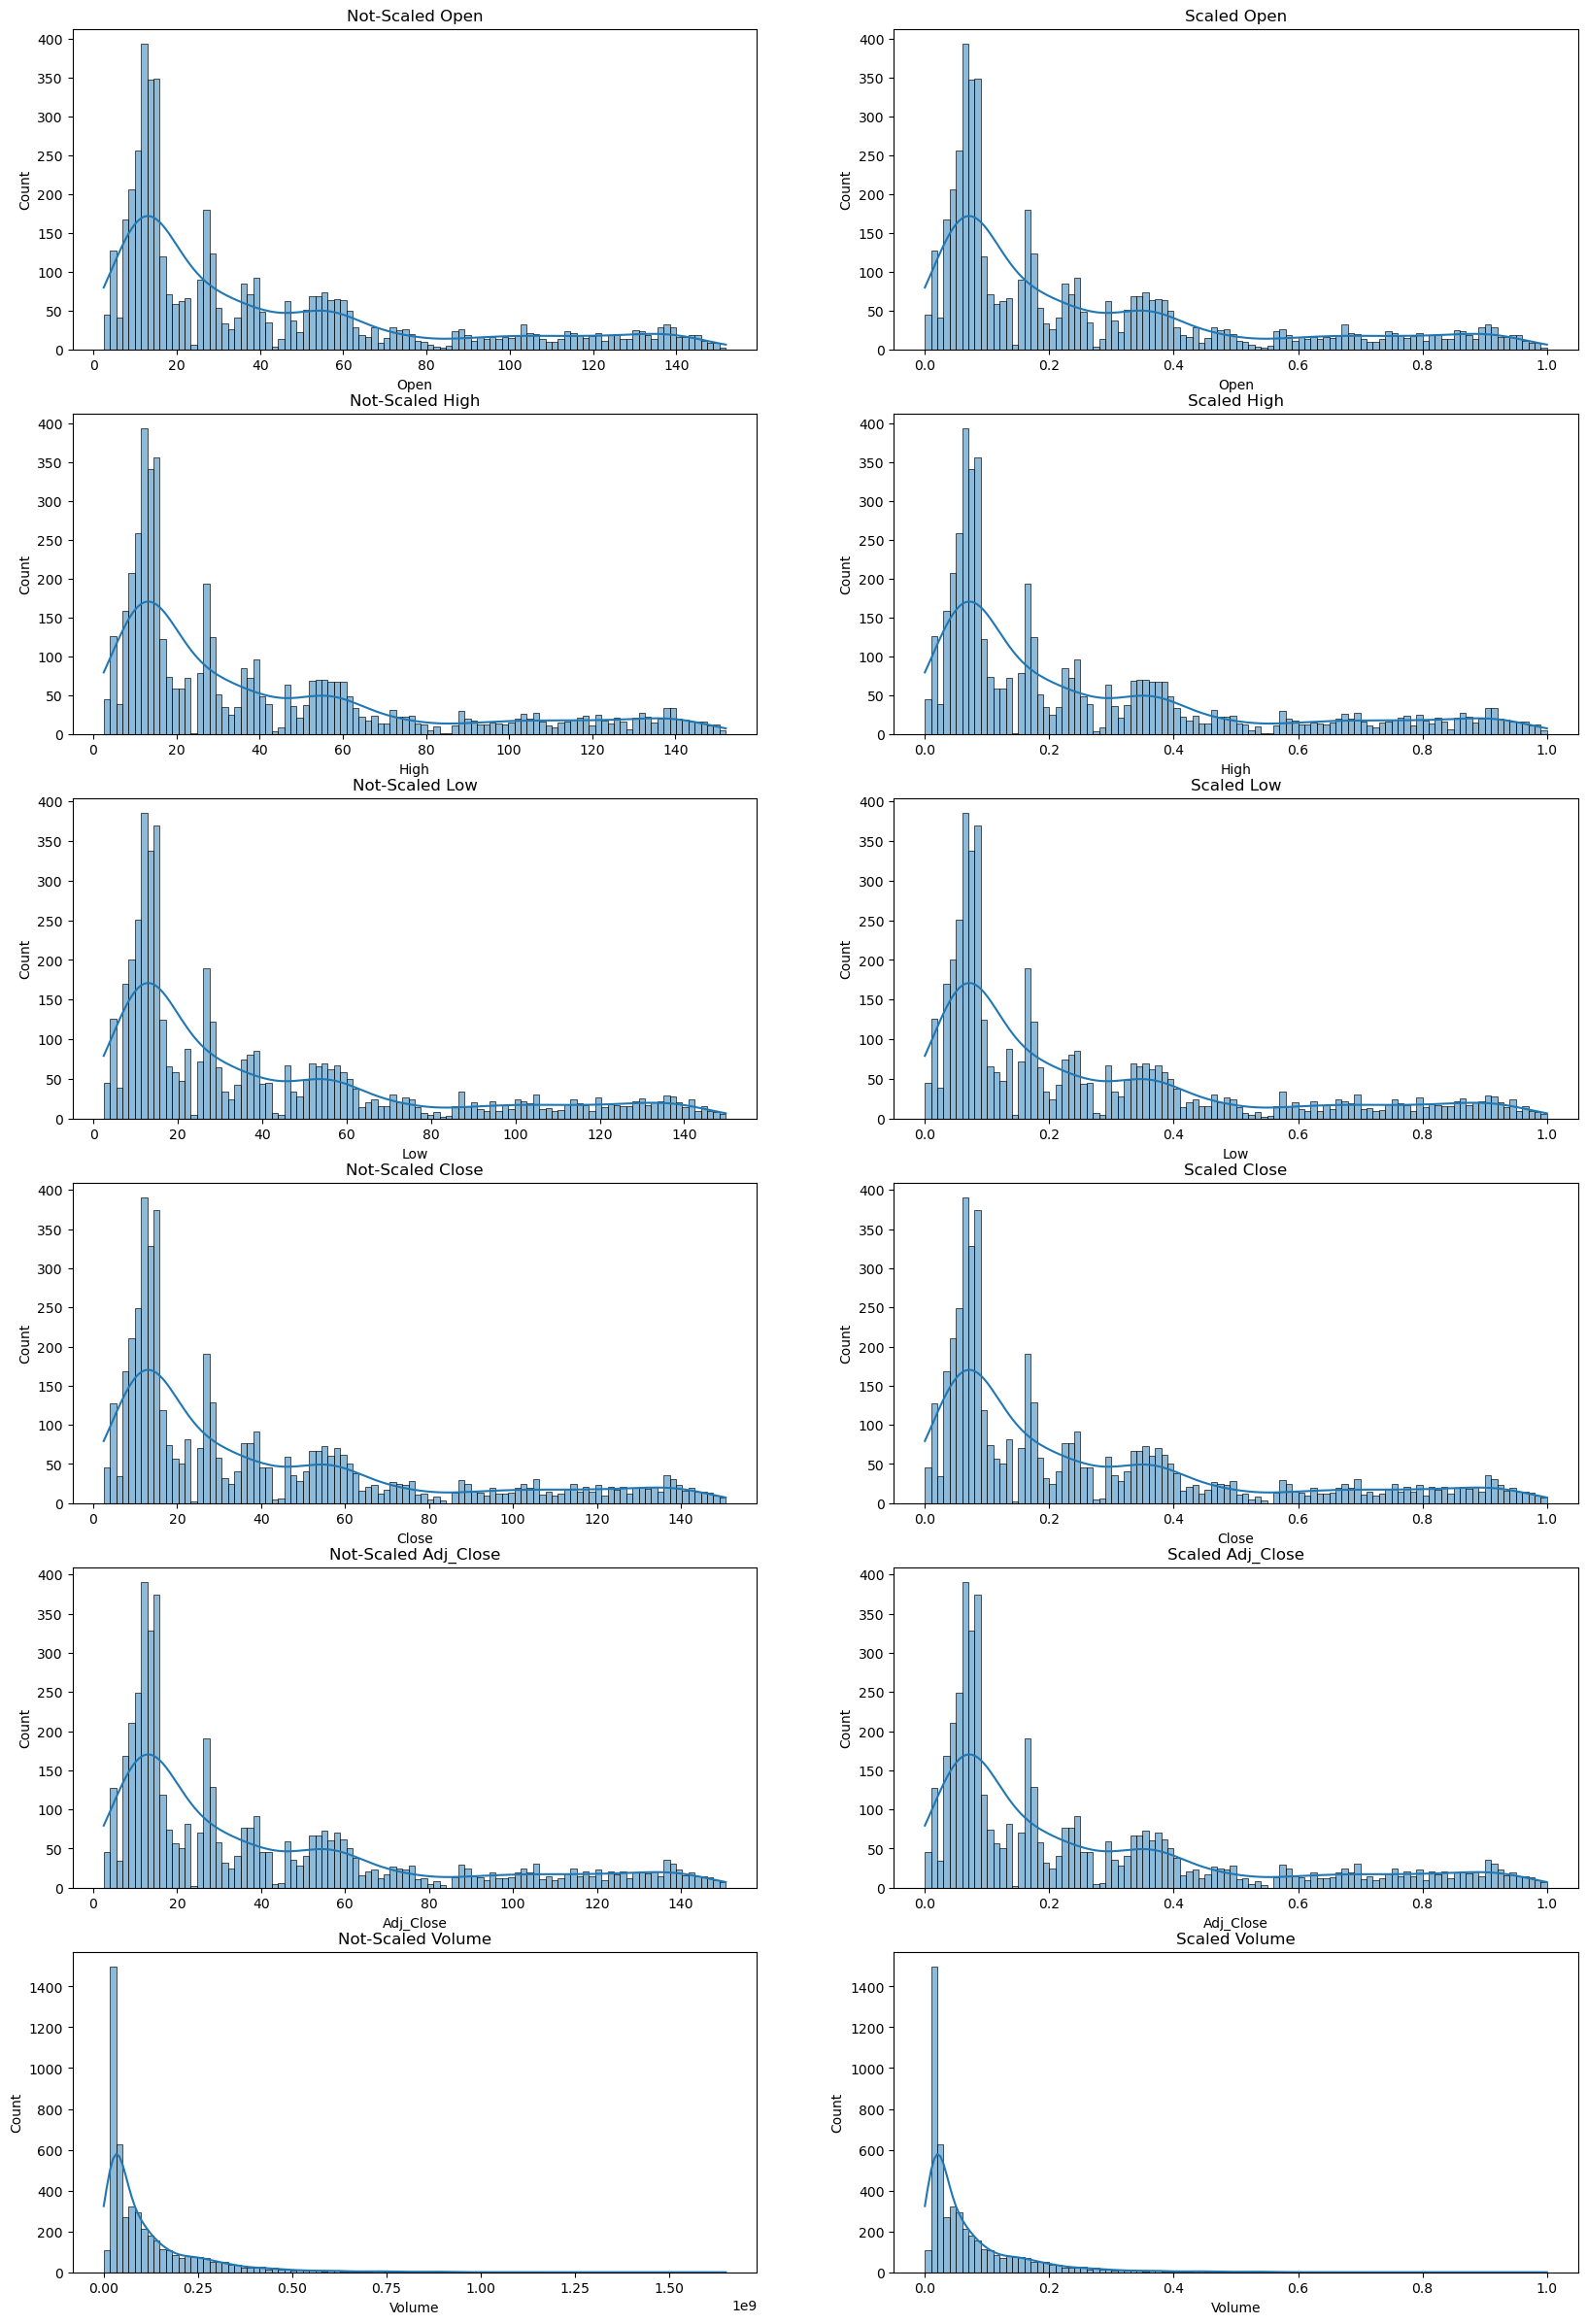

In [18]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(20,30))
for i, j in enumerate(stock_data.columns):
    if j != 'Date':
        scaler = MinMaxScaler()
        plt.subplot(6,2,2*i-1)
        ax = sns.histplot(stock_data[j], kde=True, bins=100)
        ax.set(title='Not-Scaled '+j)

        stock_data[[j]] = scaler.fit_transform(stock_data[[j]])
        
        plt.subplot(6,2,2*i)
        ax = sns.histplot(stock_data[j], kde=True, bins=100)
        ax.set(title='Scaled '+j) 

<a id='modeling_section'></a>
## 6. Predictive Modeling & Evaluation

In [19]:
# Dividing the dataset into two parts as train and test
from sklearn.model_selection import train_test_split

X = stock_data.loc[:, ['Open', 'High', 'Low', 'Adj_Close', 'Volume']]
Y = stock_data[['Date', 'Close']]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# below expressions are used to eliminate date values from the target dataset
test_y_date = test_y.copy(deep=True)
train_y.drop(columns='Date', axis=1, inplace=True)
test_y.drop(columns='Date', axis=1, inplace=True)

### Predictive Modeling

### 6.1 Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(train_x, train_y)

LinearRegression()

In [23]:
lr_test_y = lr.predict(test_x)

### 6.2 K-Nearest Neighbors Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knn = KNeighborsRegressor()

In [26]:
knn.fit(train_x, train_y)

KNeighborsRegressor()

In [27]:
knn_test_y = knn.predict(test_x)

### 6.3 Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor()

In [30]:
rf.fit(train_x, train_y)

C:\Users\hasan\AppData\Local\Temp\ipykernel_2376\4293510457.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x, train_y)


RandomForestRegressor()

In [31]:
rf_test_y = rf.predict(test_x)

### 6.4 Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree = DecisionTreeRegressor()

In [34]:
tree.fit(train_x, train_y)

DecisionTreeRegressor()

In [35]:
tree_test_y = tree.predict(test_x)

### 6.5 Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge = Ridge()

In [38]:
ridge.fit(train_x, train_y)

Ridge()

In [39]:
ridge_test_y = ridge.predict(test_x)

### 6.6 Gaussian Regression

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [41]:
gaussian = GaussianProcessRegressor()

In [42]:
gaussian.fit(train_x, train_y)

GaussianProcessRegressor()

In [43]:
gaussian_test_y = gaussian.predict(test_x)

### Evaluation

Two type of metric will be used to evaluate model predictions as follows; **R_Squared** and **Mean Squared Error(MSE)**.

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
# all the predicted values are gathered in a single dataframe called as predictors
predictions = pd.DataFrame(data={
    'Linear Regression':lr_test_y.reshape((972,)),
    'K-Nearest Neighbors Regression':knn_test_y.reshape((972,)),
    'Random Forest Regression':rf_test_y,
    'Decision Tree Regression':tree_test_y,
    'Gaussian Regression':gaussian_test_y
})

predictions.head()

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,0.088082,0.087401,0.088064,0.088050,0.088082
1,0.135311,0.135203,0.135291,0.135286,0.135311
2,0.083168,0.082487,0.083165,0.083173,0.083168
3,0.069389,0.069406,0.069381,0.069357,0.069389
4,0.359407,0.363118,0.359362,0.359373,0.359407


In [48]:
# all the r_squared results are gathered in a single dataset
r2_scores = pd.DataFrame(data={
    'Linear Regression':[r2_score(test_y, lr_test_y)],
    'K-Nearest Neighbors Regression':[r2_score(test_y, knn_test_y)],
    'Random Forest Regression':[r2_score(test_y, rf_test_y)],
    'Decision Tree Regression':[r2_score(test_y, tree_test_y)],
    'Gaussian Regression':[r2_score(test_y, gaussian_test_y)]
})

r2_scores

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,1.0,0.999909,0.999997,0.999993,1.0


In [49]:
# all the mean squared error results are gathered in a single dataset
mse_scores = pd.DataFrame(data={
    'Linear Regression':[mean_squared_error(test_y, lr_test_y)],
    'K-Nearest Neighbors Regression':[mean_squared_error(test_y, knn_test_y)],
    'Random Forest Regression':[mean_squared_error(test_y, rf_test_y)],
    'Decision Tree Regression':[mean_squared_error(test_y, tree_test_y)],
    'Gaussian Regression':[mean_squared_error(test_y, gaussian_test_y)]
})

mse_scores

,Linear Regression,K-Nearest Neighbors Regression,Random Forest Regression,Decision Tree Regression,Gaussian Regression
0,3.681631e-35,0.000006,2.415372e-07,4.668306e-07,1.847021e-14


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'K-Nearest Neighbors Regression'),
  Text(2, 0, 'Random Forest Regression'),
  Text(3, 0, 'Decision Tree Regression'),
  Text(4, 0, 'Gaussian Regression')])

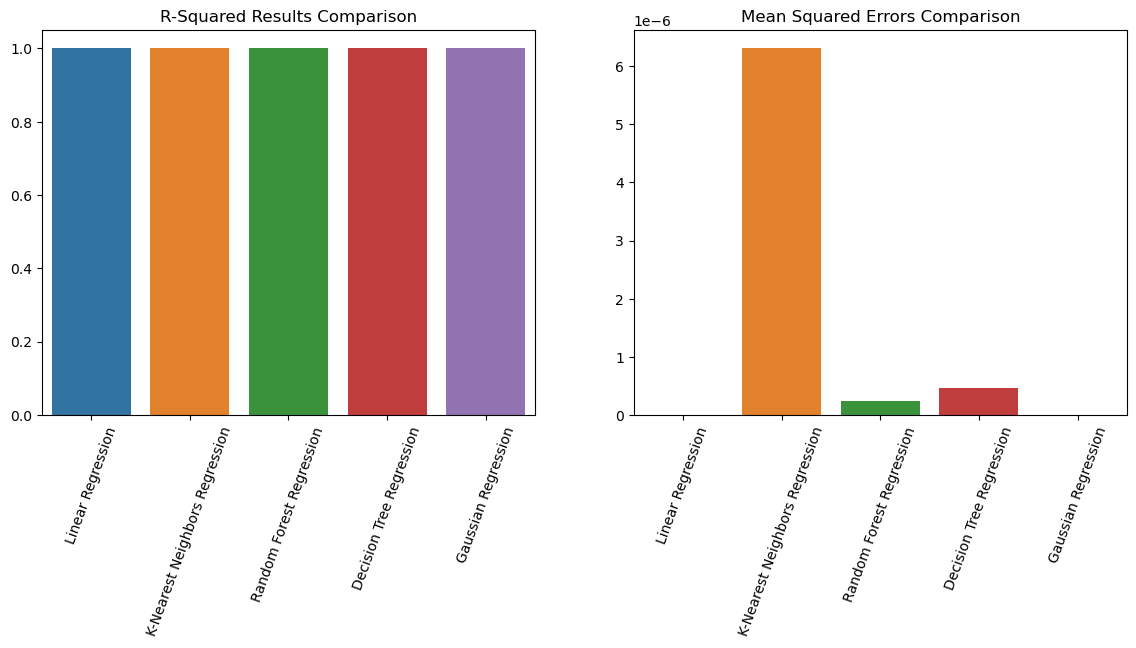

In [50]:
# Graphical representation of the models for comparison
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.barplot(r2_scores)
ax.set(title='R-Squared Results Comparison')
plt.xticks(rotation=70)

plt.subplot(1,2,2)
ax = sns.barplot(mse_scores)
ax.set(title='Mean Squared Errors Comparison')
plt.xticks(rotation=70)

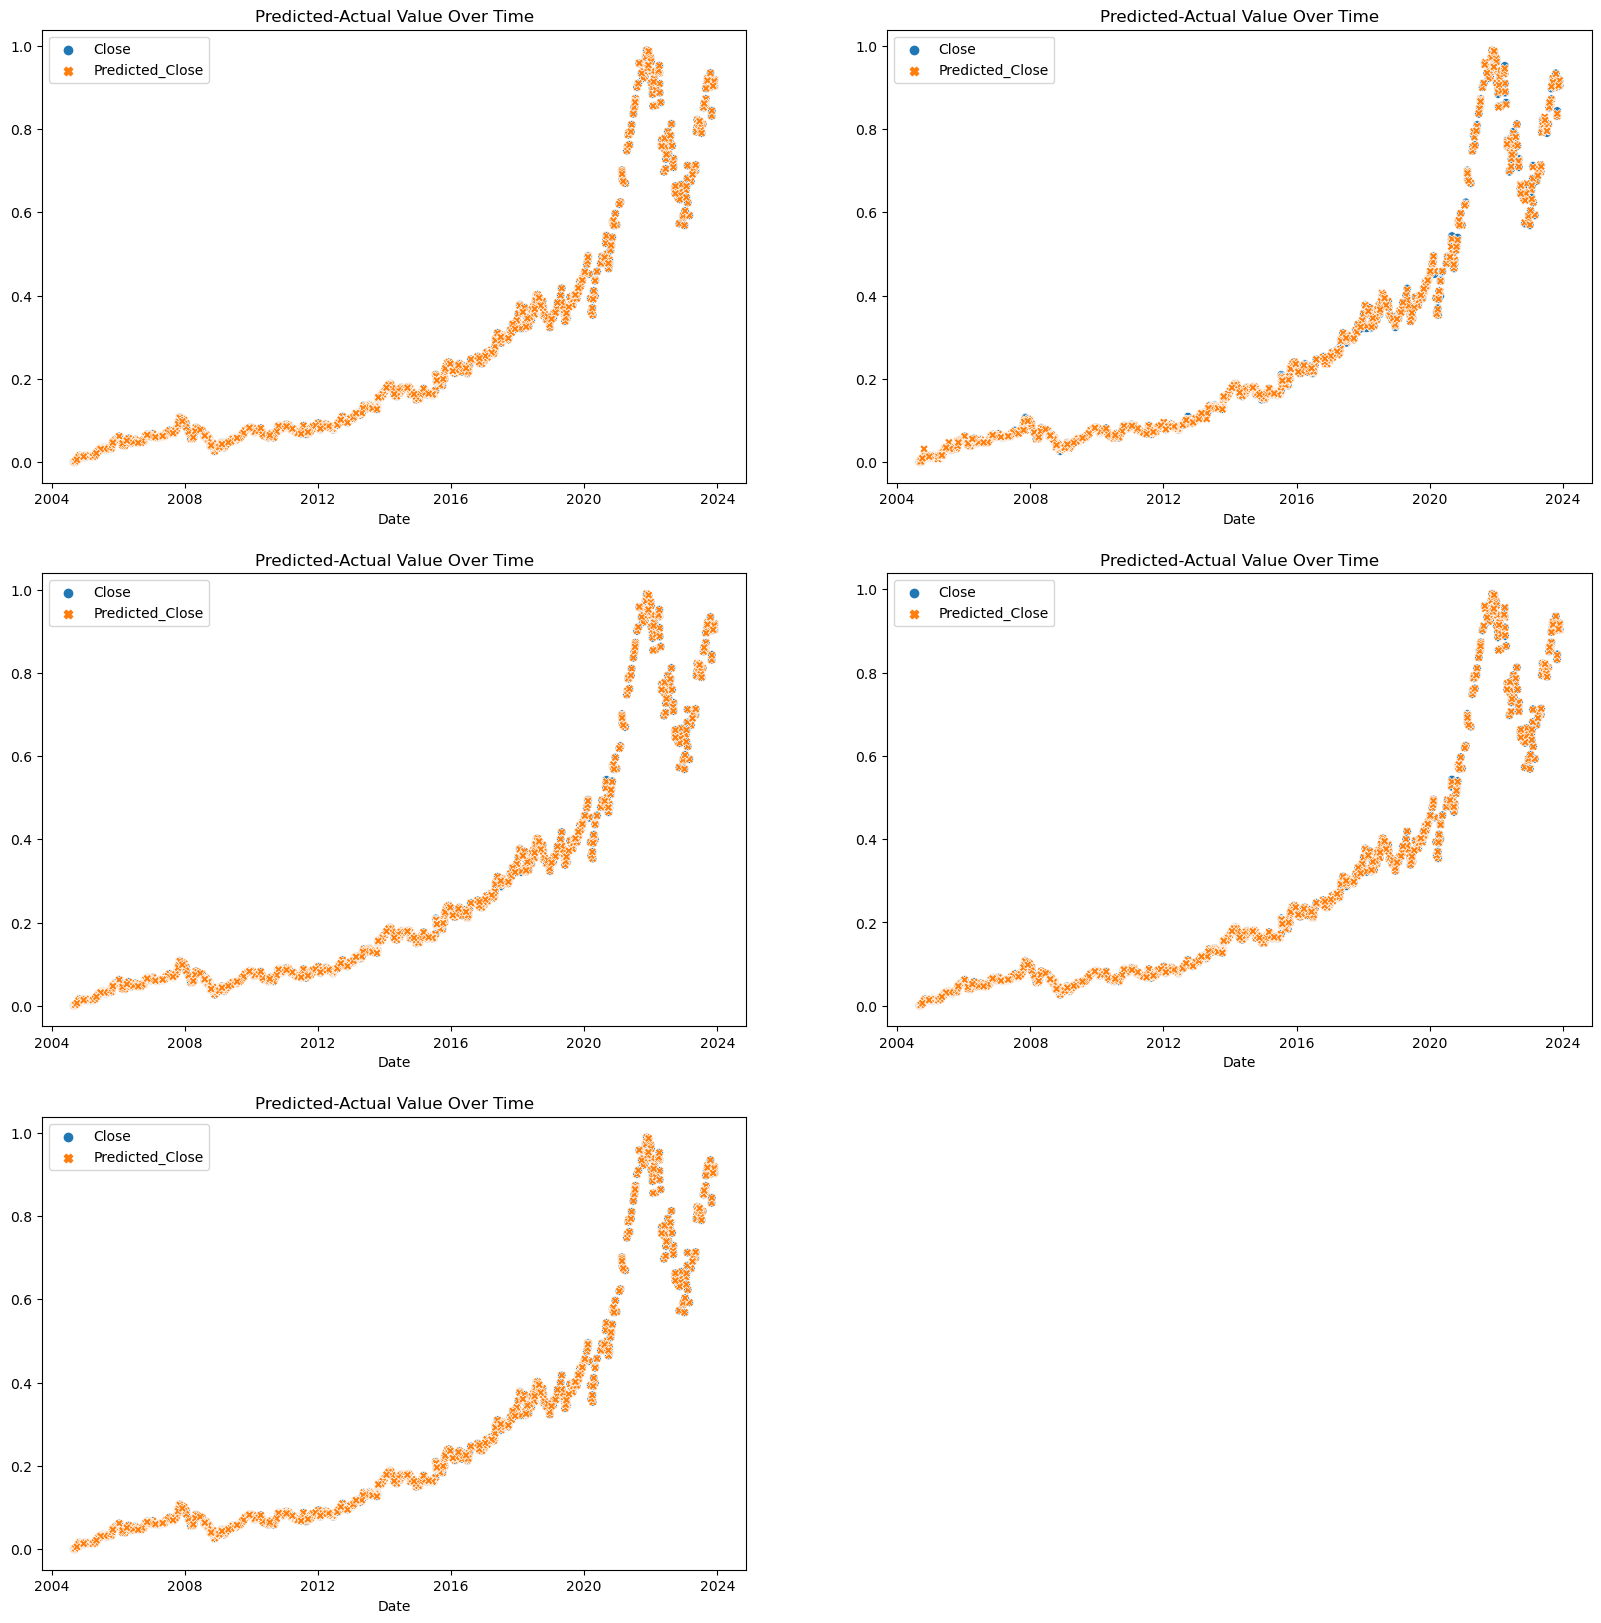

In [51]:
# Comparison of predicted and actual values
plt.figure(figsize=(20,20))
for i,j in enumerate(predictions): 
    df = test_y_date.copy(deep=True)
    df['Predicted_Close'] = predictions[j].values
    df.set_index('Date', inplace=True)

    plt.subplot(3,2,i+1)
    ax = sns.scatterplot(df)
    ax.set(title='Predicted-Actual Value Over Time')

As it can be seen from the bar plots, the most successful models are **Linear Regression** and **Gaussian Regression**. Also, all of the models are performed quite well.

<a id='assumption_control_section'></a>
## 7. Assumption Control

Linear Regression model is one of the best performed model. Hence, it is assumed as used model for assumption control step.

In [52]:
test_y_pred = lr_test_y
test_y_pred[:5]

array([[0.0880818 ],
       [0.13531126],
       [0.0831683 ],
       [0.06938897],
       [0.3594068 ]])

In [53]:
test_y_pred.shape

(972, 1)

In [55]:
test_y_pred = test_y_pred.reshape((972,1))

### 7.1. Linearity

[Text(0.5, 0, 'Predicted Values'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Predicted Values - Residual Errors Plot')]

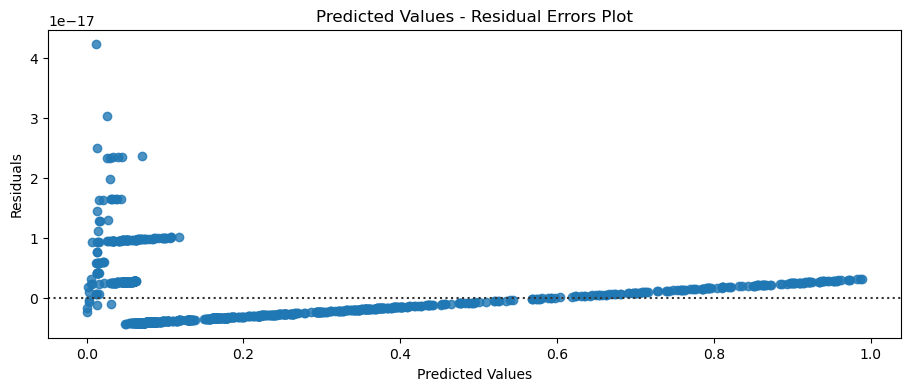

In [56]:
# Predicted Values - Residual Errors Plot

# residual calculation
# residuals = Actual Values - Predicted Values
residuals = test_y - test_y_pred

# residual plot
plt.figure(figsize=(11,4))
fig = sns.residplot(x=test_y_pred, y=residuals)
fig.set(xlabel='Predicted Values', ylabel='Residuals', title='Predicted Values - Residual Errors Plot')

As it can be seen from the Residual distribution over predicted values follows some kind of heterogeneous and funnel shaepd distribution. Thus, it can be said that the model might be applied on a dataset that can't perform well. However, the Linear Regression model is performed perfectly. Also, overfitting might be considered.

### 7.2. Autocorrelation

In [57]:
from statsmodels.stats.stattools import durbin_watson

In [58]:
durbin_watson(residuals)

array([1.71173311])

Result of the Durbin-Watson Test is almost equal to 2. Thus, it can be said that there is **no autocorrelation** which meets the assumption.

### 7.3. Multicollinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# VIF calculation
vif_df = pd.DataFrame()
vif_data = stock_data.loc[:,['Open', 'High', 'Low', 'Close']]
vif_df['feature'] = vif_data.columns
vif_df['VIF'] = [variance_inflation_factor(vif_data.values, i) 
                 for i in range(len(vif_data.columns))]

In [61]:
vif_df

,feature,VIF
0,Open,23829.299698
1,High,27050.717733
2,Low,27389.902124
3,Close,23685.412673


Results of the **Variance Inflation Factor(VIF)** is more than 5. Thus, there is **multicollinearity**. However, model performed quite well. Therefore, reduction of the multicollinearity no required.

### 7.4. Heteroscedasticity

In [62]:
# Predicted Values - Residual Errors Plot

[Text(0.5, 0, 'Predicted Values'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Predicted Values - Residual Errors Plot')]

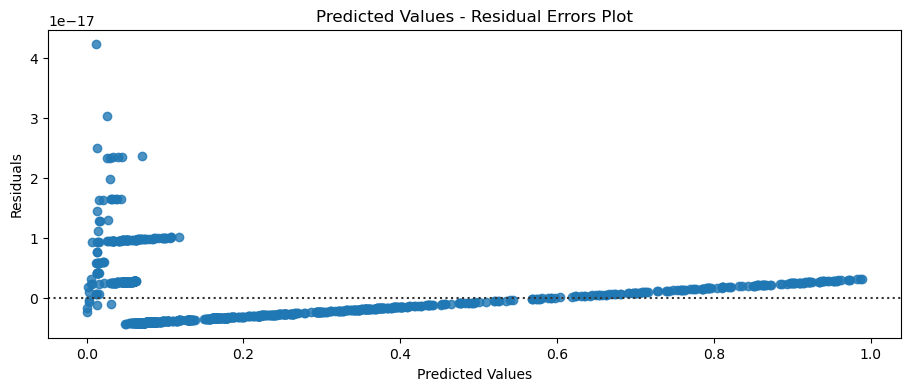

In [63]:
# residual plot
plt.figure(figsize=(11,4))
fig = sns.residplot(x=test_y_pred, y=residuals)
fig.set(xlabel='Predicted Values', ylabel='Residuals', title='Predicted Values - Residual Errors Plot')

In [64]:
# Breusch-Pagan Test

# importing libraries
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# create regression model
lr_model = smf.ols('Close ~ Open+High+Low+Adj_Close+Volume', data=stock_data)

# fittin the regression model
lr_model = lr_model.fit()

# applying Breusch-Pagan Test on the linear regression model
test_result = sms.het_breuschpagan(lr_model.resid, lr_model.model.exog)

# arranging names of the test results
names = ['Lagrange Multiplier Statistic', 'Lagrange p-value', 'f-statistic', 'f-statistic p-value']
test_result = lzip(names, test_result)
test_result[1]

('Lagrange p-value', 0.0)

In [65]:
# White's Test

# importing libraries
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# create regression model
lr_model = smf.ols('Close ~ Open+High+Low+Adj_Close+Volume', data=stock_data)

# fittin the regression model
lr_model = lr_model.fit()

# applying Breusch-Pagan Test on the linear regression model
test_result = sms.het_white(lr_model.resid, lr_model.model.exog)

# arranging names of the test results
names = ['Lagrange Multiplier Statistic', 'Lagrange p-value', 'f-statistic', 'f-statistic p-value']
test_result = lzip(names, test_result)
test_result[1]

('Lagrange p-value', 0.0)


As it can be seen from the funnel shaped **Residual-Predicted Values Plot** and result of the **Breusche-Pagan** and **White Tests**, it can be said that there is **heteroscadasticity**. Therefore, variance of the residuals might be needed reduced to a some kind of constant value instead of accelerating values. In order to eliminate heteroscedasticity, non-linear scaling might be considered such as log(y), √y, etc.

### 7.5. Residuals' Gaussian Distribution

In [66]:
import statsmodels.api as sm 

In [67]:
# Q-Q(Quantile-Quantile) Plots

<function matplotlib.pyplot.show(close=None, block=None)>

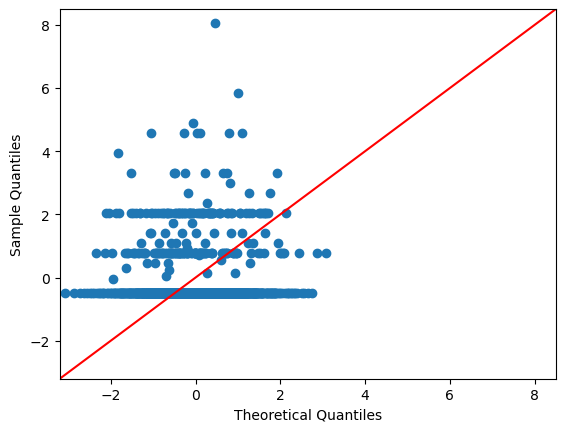

In [68]:
# QQ PLot For Residuals 
sm.qqplot(residuals, fit=True, line ='45')
plt.show # if this is not used then qqplot returns two identical plot

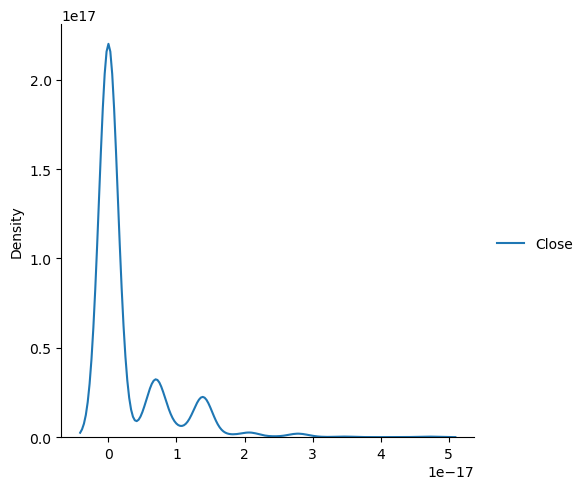

In [69]:
# Distribution PLot For Residuals
sns.displot(residuals, kind='kde')

In [70]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

# Shapiro-Wilk Test For Residuals
shapiro(residuals)

ShapiroResult(statistic=0.541919469833374, pvalue=1.5414283107572988e-44)

As the results suggests, the data has no normal distribution.